In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/sales_data.csv")

# Show first 5 rows
df.head()


,date,product_id,category,price,quantity_sold
0,2024-01-01,P001,Electronics,25000,5
1,2024-01-02,P001,Electronics,25000,7
2,2024-01-03,P001,Electronics,24000,10
3,2024-01-01,P002,Clothing,1500,20
4,2024-01-02,P002,Clothing,1500,18


In [3]:
# Dataset shape
print("Shape:", df.shape)

# Column names
print("\nColumns:")
print(df.columns)

# Data types & null values
print("\nDataset Info:")
df.info()


Shape: (12, 5)

Columns:
Index(['date', 'product_id', 'category', 'price', 'quantity_sold'], dtype='str')

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   date           12 non-null     str  
 1   product_id     12 non-null     str  
 2   category       12 non-null     str  
 3   price          12 non-null     int64
 4   quantity_sold  12 non-null     int64
dtypes: int64(2), str(3)
memory usage: 612.0 bytes


In [4]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Sort data by date
df = df.sort_values(by='date')

# Reset index
df = df.reset_index(drop=True)

df.head()


Missing values:
 date             0
product_id       0
category         0
price            0
quantity_sold    0
dtype: int64


,date,product_id,category,price,quantity_sold
0,2024-01-01,P001,Electronics,25000,5
1,2024-01-01,P002,Clothing,1500,20
2,2024-01-01,P003,Groceries,200,50
3,2024-01-02,P001,Electronics,25000,7
4,2024-01-02,P002,Clothing,1500,18


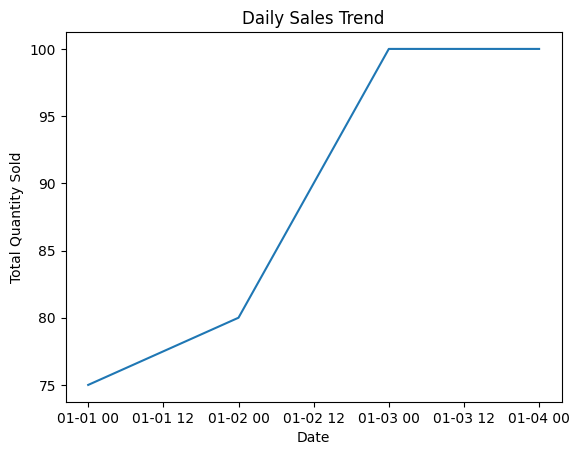

In [5]:
import matplotlib.pyplot as plt

# Aggregate total quantity sold per day
daily_sales = df.groupby('date')['quantity_sold'].sum()

# Plot
plt.figure()
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.title("Daily Sales Trend")
plt.show()



In [6]:
# Create time-based features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday

df.head()



,date,product_id,category,price,quantity_sold,day,month,day_of_week
0,2024-01-01,P001,Electronics,25000,5,1,1,0
1,2024-01-01,P002,Clothing,1500,20,1,1,0
2,2024-01-01,P003,Groceries,200,50,1,1,0
3,2024-01-02,P001,Electronics,25000,7,2,1,1
4,2024-01-02,P002,Clothing,1500,18,2,1,1


In [7]:
# Select input features
X = df[['price', 'day', 'month', 'day_of_week']]

# Target variable (what we want to predict)
y = df['quantity_sold']

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (12, 4)
y shape: (12,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)

print("Model trained successfully!")



Model trained successfully!


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 20.82202038607896
MSE: 554.062892458231
RMSE: 23.538540576217358


In [10]:
# Example: Predict demand for a future day
# Assumptions (you can explain these in viva)
future_data = pd.DataFrame({
    'price': [24000],
    'day': [5],
    'month': [1],
    'day_of_week': [5]  # Saturday
})

future_prediction = model.predict(future_data)

print("Predicted quantity sold:", round(future_prediction[0]))


Predicted quantity sold: 35


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")


Random Forest model trained successfully!


In [12]:
# Predict using Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluation metrics
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)


Random Forest MAE: 3.3433333333333324
Random Forest RMSE: 3.8588297016928155


In [13]:
import pickle

# Save the trained Random Forest model
with open("../models/demand_forecast_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")


Model saved successfully!


In [14]:
from sklearn.preprocessing import LabelEncoder

# Create encoders
product_encoder = LabelEncoder()
category_encoder = LabelEncoder()

# Encode categorical columns
df['product_id_encoded'] = product_encoder.fit_transform(df['product_id'])
df['category_encoded'] = category_encoder.fit_transform(df['category'])

# Check result
df[['product_id', 'product_id_encoded', 'category', 'category_encoded']].head()


,product_id,product_id_encoded,category,category_encoded
0,P001,0,Electronics,1
1,P002,1,Clothing,0
2,P003,2,Groceries,2
3,P001,0,Electronics,1
4,P002,1,Clothing,0


In [15]:
# Updated feature set including product & category
X = df[
    [
        'price',
        'day',
        'month',
        'day_of_week',
        'product_id_encoded',
        'category_encoded'
    ]
]

y = df['quantity_sold']

print("Updated X shape:", X.shape)


Updated X shape: (12, 6)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Product-aware Random Forest model trained successfully!")


Product-aware Random Forest model trained successfully!


In [17]:
import pickle

# Save the new product-aware model
with open("../models/demand_forecast_model.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Product-aware model saved successfully!")


Product-aware model saved successfully!
